<a href="https://colab.research.google.com/github/NehaSontakk/BATH-Prokka-Comparison/blob/main/Annotation_Name_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gffpandas
!sudo apt-get install bedops
!pip install biopython

In [2]:
bath_prokka_aligned_annotations = "/content/drive/MyDrive/Lab Work/Parkinsons_Data/BIN152/Aligned Outputs/Aligned_Outputs_bin152.xlsx"
annotation_match_storage = "/content/drive/MyDrive/Lab Work/Parkinsons_Data/BIN152/Alignment_Overlaps_Unique_Bedmap_COGs_bin152.xlsx"
length_comparison_output = '/content/drive/MyDrive/Lab Work/Parkinsons_Data/BIN152/bin152_length_comparison.xlsx'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import gffpandas.gffpandas as gffpd
from Bio import SeqIO
import requests
import re

In [4]:
alignments = pd.read_excel(length_comparison_output)

Filter dataset to just the annotations that align to each other

In [5]:
alignment_overlaps = alignments[alignments['label']=="BATH and Prokka Annotated"]

### Annotation label comparison

In [6]:
alignment_overlaps['Annotation_Match'] = 'No'

for index, row in alignment_overlaps.iterrows():
    prokka_protein = ""
    bath_protein = ""
    if row['label'] == "BATH and Prokka Annotated":
        prokka_protein = row['Prokka'].split(":")[-1]
        bath_protein = row['BATH'].split("\t")[-3]
        if prokka_protein == bath_protein:
            alignment_overlaps.loc[index, 'Annotation_Match'] = 'Yes'

<ipython-input-6-357b807f7606>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alignment_overlaps['Annotation_Match'] = 'No'


Do the annotation labels match?

In [7]:
alignment_overlaps['Annotation_Match'].value_counts()

,count
Annotation_Match,
No,179
Yes,118


### COG Level Overlap

In [8]:
#Retrieve the right COGs for each dataframe
def get_eggnog_link(protein_name):
  if protein_name != "":
    url = f"https://rest.uniprot.org/uniprotkb/search?query={protein_name}&format=json"
    #print(url)
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        #print(data.get(""))
        for result in data.get('results', []):
            #print(result)
            cross_refs = result.get("uniProtKBCrossReferences", [])
            #print(cross_refs)
            for ref in cross_refs:
                if ref.get('database') == 'eggNOG':
                    return ref.get('id')
    except requests.RequestException as e:
        print(f"Request failed: {e}")
  else:
    return None


### !Uncomment if you are doing a new set

In [9]:
alignment_overlaps['Prokka COGs'] = alignment_overlaps['Prokka'].apply(lambda x: get_eggnog_link(x.split(":")[-1]))

<ipython-input-9-610285e70e5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alignment_overlaps['Prokka COGs'] = alignment_overlaps['Prokka'].apply(lambda x: get_eggnog_link(x.split(":")[-1]))


In [10]:
alignment_overlaps['BATH']

,BATH
87,k127_2253129\t901\t2262\tQ99SX1\t+\t0
90,k127_2253129\t11353\t11787\tO35016\t+\t0
91,k127_2033476\t541\t1671\tP80092\t+\t0
92,k127_2033476\t3426\t3785\tMF_00101\t+\t0
93,k127_2033476\t3829\t5298\tQ9X024\t+\t0
...,...
401,k127_2982141\t9733\t11265\tMF_00139\t+\t0
402,k127_2982141\t11286\t12548\tMF_00138\t+\t0
403,k127_2982141\t12931\t13911\tA3DDX7\t+\t0
405,k127_2982141\t16989\t17780\tMF_00228\t+\t0


In [11]:
#Hasn't been working well
alignment_overlaps['BATH COGs'] = alignment_overlaps['BATH'].apply(lambda x: get_eggnog_link(x.split('\t')[-3]))

<ipython-input-11-e625b6ba122f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alignment_overlaps['BATH COGs'] = alignment_overlaps['BATH'].apply(lambda x: get_eggnog_link(x.split('\t')[-3]))


In [ ]:
def get_eggnog_link(protein_name):
    if protein_name != "":
        url = f"https://rest.uniprot.org/uniprotkb/search?query={protein_name}&format=json"
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()
            for result in data.get('results', []):
                cross_refs = result.get("uniProtKBCrossReferences", [])
                for ref in cross_refs:
                    if ref.get('database') == 'eggNOG':
                        return ref.get('id')
        except requests.RequestException as e:
            print(f"Request failed: {e}")
    return None

def debug_split(x):
    parts = re.split(r'\s+', x)  # This uses regular expressions to split by any whitespace
    print(parts)  # This will print the split results
    if len(parts) >= 3:
        return get_eggnog_link(parts[-3])
    else:
        print(f"Not enough parts in the list: {parts}")  # Optional: Print an error or warning
        return None

alignment_overlaps['BATH COGs'] = alignment_overlaps['BATH'].apply(debug_split)


In [13]:
alignment_overlaps.to_excel(annotation_match_storage)

## PART 2

In [14]:
alignment_overlaps = pd.read_excel(annotation_match_storage)

In [15]:
alignment_overlaps['Name_or_COG_Match'] = 'No'

for index, row in alignment_overlaps.iterrows():
    prokka_COG = row['Prokka COGs']
    bath_COG = row['BATH COGs']
    prokka_protein = row['Prokka'].split(":")[-1]
    bath_parts = re.split(r'\s+', row['BATH'])
    if len(bath_parts) >= 3:
        bath_protein = bath_parts[-3]
        if (prokka_COG == bath_COG) or (prokka_protein == bath_protein):
            alignment_overlaps.loc[index, 'Name_or_COG_Match'] = 'Yes'
    else:
        print(f"Not enough parts in the list for index {index}: {bath_parts}")


In [16]:
alignment_overlaps['Name_or_COG_Match'].value_counts()

,count
Name_or_COG_Match,
Yes,187
No,110


In [17]:
#How many because there are no annotations?

print(alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['Prokka COGs'].isna()) & (alignment_overlaps['BATH COGs'].isna())].shape[0])

bath_none_count = alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['BATH COGs'].isna())].shape[0]

prokka_none_count = alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['Prokka COGs'].isna())].shape[0]

print(f"Number of rows with 'Name_or_COG_Match' == 'No' and no 'BATH COGs': {bath_none_count}")
print(f"Number of rows with 'Name_or_COG_Match' == 'No' and no 'Prokka COGs': {prokka_none_count}")


3
Number of rows with 'Name_or_COG_Match' == 'No' and no 'BATH COGs': 9
Number of rows with 'Name_or_COG_Match' == 'No' and no 'Prokka COGs': 55


In [ ]:
alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['Prokka COGs'].isna())]['Name_or_COG_Match'] = np.nan
alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['BATH COGs'].isna())]['Name_or_COG_Match'] = np.nan
alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['Prokka COGs'].isna()) & (alignment_overlaps['BATH COGs'].isna())]['Name_or_COG_Match'] = np.nan

In [ ]:
!pip install squarify

In [20]:
match_annotations = alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == 'Yes')].shape[0]
mismatch_annotations = alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == 'No') & (~alignment_overlaps['Prokka COGs'].isna()) & (~alignment_overlaps['BATH COGs'].isna())].shape[0]
missing_both = alignment_overlaps[(alignment_overlaps['Prokka COGs'].isna()) & (alignment_overlaps['BATH COGs'].isna())].shape[0]
missing_cogs_bath = alignment_overlaps[(alignment_overlaps['BATH COGs'].isna()) & (~alignment_overlaps['Prokka COGs'].isna())].shape[0]
missing_cogs_prokka = alignment_overlaps[(alignment_overlaps['Prokka COGs'].isna()) & (~alignment_overlaps['BATH COGs'].isna())].shape[0]


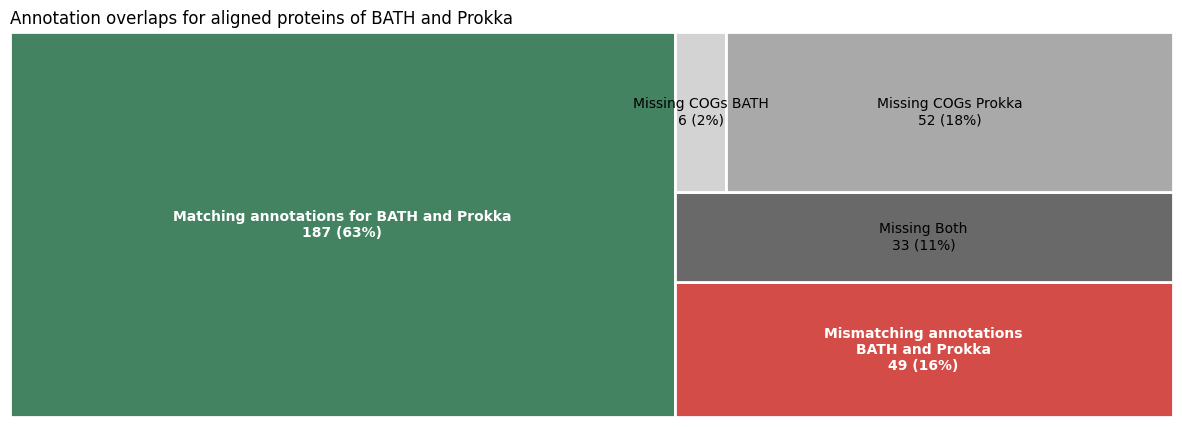

In [21]:
import matplotlib.pyplot as plt
import squarify

# Data
total = alignment_overlaps.shape[0]
categories = [
    'Matching annotations for BATH and Prokka',
    'Mismatching annotations\nBATH and Prokka',
    'Missing Both',
    'Missing COGs BATH',
    'Missing COGs Prokka'
]
values = [match_annotations, mismatch_annotations, missing_both, missing_cogs_bath, missing_cogs_prokka]

# Calculate percentages
percentages = [value / total * 100 for value in values]

# Create labels with percentages
labels = [f'{cat}\n{val} ({perc:.0f}%)' for cat, val, perc in zip(categories, values, percentages)]

# Plot the treemap
plt.figure(figsize=(15, 5))
colors = ['#448361', '#D44C47', '#696969', '#D3D3D3', '#A9A9A9']
squarify.plot(sizes=values, label=labels, color=colors, edgecolor="white", linewidth=2)

# Customize text colors and make the first two labels bold and white
for i in range(len(labels)):
    text = plt.gca().texts[i]
    if i < 2:  # First two categories
        text.set_color('white')
        text.set_fontweight('bold')

plt.title('Annotation overlaps for aligned proteins of BATH and Prokka', loc='left')
plt.axis('off')  # Hide axes
plt.savefig("Fig5A_annotations_name.svg", dpi=300, transparent=True, bbox_inches='tight')
plt.show()


In [22]:
alignment_overlaps.to_excel(annotation_match_storage, index=False)

In [23]:
alignment_overlaps = pd.read_excel(annotation_match_storage)

     Unnamed: 0.1  Unnamed: 0                                        BATH  \
0              87          87       k127_2253129\t901\t2262\tQ99SX1\t+\t0   
1              90          90    k127_2253129\t11353\t11787\tO35016\t+\t0   
2              91          91       k127_2033476\t541\t1671\tP80092\t+\t0   
3              92          92    k127_2033476\t3426\t3785\tMF_00101\t+\t0   
4              93          93      k127_2033476\t3829\t5298\tQ9X024\t+\t0   
..            ...         ...                                         ...   
292           401         401   k127_2982141\t9733\t11265\tMF_00139\t+\t0   
293           402         402  k127_2982141\t11286\t12548\tMF_00138\t+\t0   
294           403         403    k127_2982141\t12931\t13911\tA3DDX7\t+\t0   
295           405         405  k127_2982141\t16989\t17780\tMF_00228\t+\t0   
296           406         406  k127_2982141\t17781\t18393\tMF_00097\t+\t0   

    BATH_annot   BATH_contig  BATH_end  BATH_start  \
0       Q99SX1  k127_

<ipython-input-24-937abea8e243>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Name_or_COG_Match', y='Shifts', data=alignment_overlaps, palette="Set2")


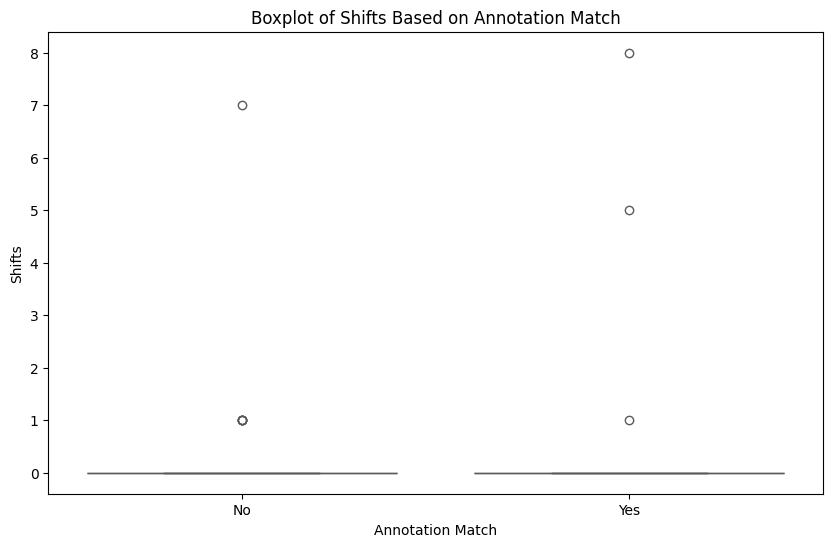

In [24]:
alignment_overlaps['Shifts'] = alignment_overlaps['BATH'].apply(lambda x: int(x.split('\t')[-1]))

# Display the DataFrame to verify the new column
print(alignment_overlaps)

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Name_or_COG_Match', y='Shifts', data=alignment_overlaps, palette="Set2")

# Add title and labels
plt.title('Boxplot of Shifts Based on Annotation Match')
plt.xlabel('Annotation Match')
plt.ylabel('Shifts')

# Display the plot
plt.show()

### Alignment length for overlaping annotations and names

In [35]:
alignment_overlaps['Prokka_BATH_3Mult'] = alignment_overlaps['Merged_Column']*3

In [28]:
alignment_overlaps.loc[alignment_overlaps['Name_or_COG_Match'] == 'Yes'].columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'BATH', 'BATH_annot', 'BATH_contig',
       'BATH_end', 'BATH_start', 'Prokka', 'Prokka_annot', 'Prokka_contig',
       'Prokka_end', 'Prokka_start', 'label', 'target name', 'query name',
       'E-value', 'shifts', 'Prodigal ORF Amino', 'HMM_Alignment_Length',
       'Protein_HMM_filepath', 'Protein_FA_File_Status',
       'Protein_FA_File_Path', 'Prokka Uniprot Protein Sequence',
       'Prodigal ORF Length', 'Prokka ORF phmmer E-value',
       'Prokka ORF phmmer ali from', 'Prokka ORF phmmer ali to',
       'Prokka ORF phmmer length', 'Prokka ORF HMM phmmer E-value',
       'Prokka ORF HMM phmmer ali from', 'Prokka ORF HMM phmmer ali to',
       'Prokka ORF HMM phmmer length', 'Merged_Column', 'Prokka_SW',
       'Annotation_Match', 'Prokka COGs', 'BATH COGs', 'Name_or_COG_Match',
       'Shifts'],
      dtype='object')

<ipython-input-36-212b2565d41f>:6: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  scatter = sns.scatterplot(


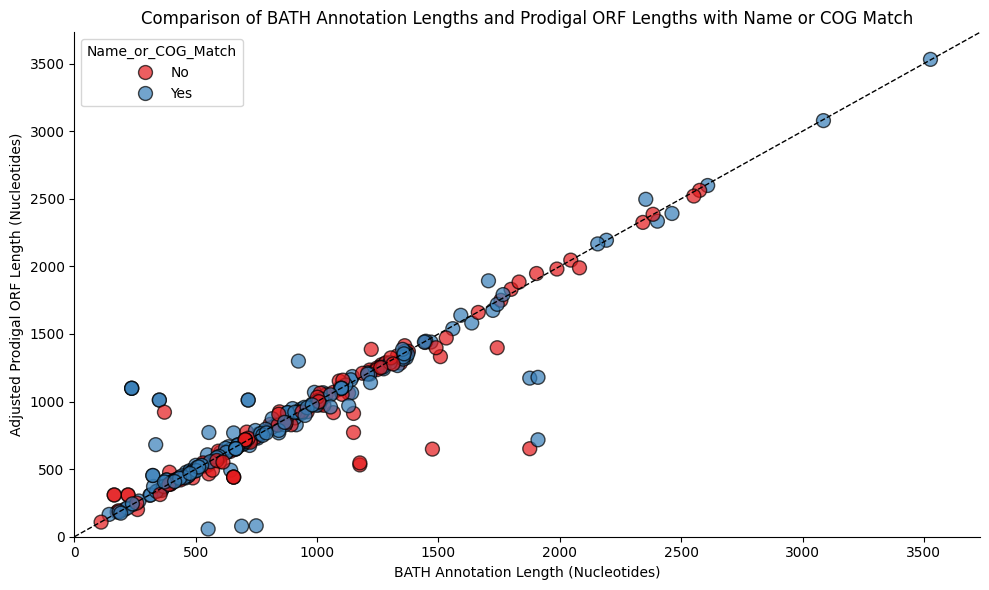

In [36]:
cmap = sns.color_palette("Set1", as_cmap=False)
alignment_overlaps['BATH_length'] = abs(alignment_overlaps['BATH_end']- alignment_overlaps['BATH_start'])

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='BATH_length',
    y='Prokka_BATH_3Mult',
    hue='Name_or_COG_Match',
    data=alignment_overlaps,
    palette=cmap,
    s=100,
    alpha=0.7,
    edgecolor='black',
    linewidth=1
)

max_length = max(alignment_overlaps['Prokka_BATH_3Mult'].max(), alignment_overlaps['BATH_length'].max()) + 200  # +200 for a bit of margin
plt.plot([0, max_length], [0, max_length], color='black', linestyle='--', linewidth=1)

plt.title('Comparison of BATH Annotation Lengths and Prodigal ORF Lengths with Name or COG Match')
plt.xlabel('BATH Annotation Length (Nucleotides)')
plt.ylabel('Adjusted Prodigal ORF Length (Nucleotides)')
plt.xlim(0, max_length)
plt.ylim(0, max_length)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("Fig6_lengthBATHProdigal.svg", dpi=300, transparent=True, bbox_inches='tight')
plt.show()